# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
citipy_cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    citipied = citipy.nearest_city(lat_lng[0], lat_lng[1])
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        citipy_cities.append(citipied)
        
for city in citipy_cities:
    country = city.country_code
    countries.append(country)

# Print the city count to confirm sufficient count
len(cities)

642

In [3]:
#Create a Dataframe with spelled out Countries
countrycode_path = "country_codes.xls"
countrycode_df = pd.read_excel(countrycode_path, encoding="utf-8")

equator_cities = pd.DataFrame({'City':cities, 'Country Code': countries})
grouped_country = equator_cities.groupby("Country Code").count().sort_values(by=['City'],ascending = False)
grouped_country.head()


df = pd.merge(equator_cities, countrycode_df, on='Country Code', how='outer').dropna()
del df["Country Code"]
df.head()

,City,Country
0,itoman,Japan
1,hasaki,Japan
2,naze,Japan
3,wajima,Japan
4,wakkanai,Japan


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
df["Cloudiness"] = ""
df["Date"] = ""
df["Humidity"] = ""
df["Lat"] = ""
df["Lng"] = ""
df["Max Temp"] = ""
df["Wind Speed"] = ""
df = df[['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']]
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,itoman,,Japan,,,,,,
1,hasaki,,Japan,,,,,,
2,naze,,Japan,,,,,,
3,wajima,,Japan,,,,,,
4,wakkanai,,Japan,,,,,,


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_data = []


print("Beginning Data Retrieval     ")
print("-----------------------------")
record_count = 1
set_count = 1

# Loop through all the cities in our list
for index, row in df.iterrows():
    
    city = row["City"]

    # Group cities in sets of 50 for logging purposes
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0

   # Create endpoint URL with each city
    city_url = url + "&q=" + city

   # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

   # Add 1 to the record count
    record_count += 1

   # Run an API request for each of the cities
    try:
       # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

       # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

       # Append the City information into city_data list
        city_data.append({"City": city,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

        df.loc[index, "Lat"] = city_lat
        df.loc[index, "Lng"] = city_lat
        df.loc[index, "Max Temp"] = city_max_temp
        df.loc[index, "Humidity"] = city_humidity
        df.loc[index, "Cloudiness"] = city_clouds
        df.loc[index, "Wind Speed"] = city_wind
        df.loc[index, "Date"] = city_date

   # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | itoman
Processing Record 2 of Set 1 | hasaki
Processing Record 3 of Set 1 | naze
Processing Record 4 of Set 1 | wajima
Processing Record 5 of Set 1 | wakkanai
Processing Record 6 of Set 1 | kushiro
Processing Record 7 of Set 1 | shingu
Processing Record 8 of Set 1 | miyako
Processing Record 9 of Set 1 | katsuura
Processing Record 10 of Set 1 | poum
Processing Record 11 of Set 1 | vao
Processing Record 12 of Set 1 | noumea
Processing Record 13 of Set 1 | pouebo
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | cherskiy
Processing Record 18 of Set 1 | novyy urengoy
Processing Record 19 of Set 1 | cheuskiny
City not found. Skipping...
Processing Record 20 of Set 1 | krasnooktyabrskiy
Processing Record 21 of Set 1 | amga
Processing Record 22 of Set 1 | nikols

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df.dtypes

City          object
Cloudiness    object
Country       object
Date          object
Humidity      object
Lat           object
Lng           object
Max Temp      object
Wind Speed    object
dtype: object

In [7]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,itoman,75,Japan,1562384725,88,26.12,26.12,80.6,9.17
1,hasaki,75,Japan,1562384440,88,35.73,35.73,71.6,12.75
2,naze,73,Japan,1562384725,97,5.43,5.43,71.69,3.83
3,wajima,40,Japan,1562384725,69,37.4,37.4,77,8.05
4,wakkanai,40,Japan,1562384725,72,45.41,45.41,64.4,17.22


In [8]:
df.to_csv("city data.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

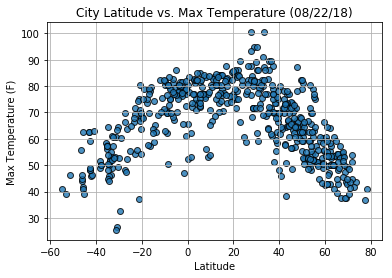

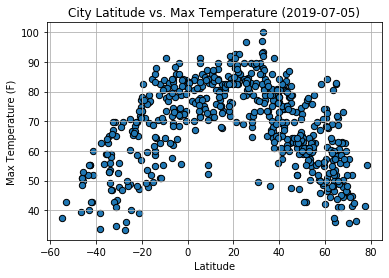

In [19]:
import datetime
today = datetime.date.today()


plt.scatter(pd.to_numeric(df.Lat, errors='coerce'), pd.to_numeric(df["Max Temp"], errors='coerce'), marker="o", 
            edgecolors="black", s=40)
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.axis(aspect='image')
plt.grid()
plt.savefig("City Lat vs Max Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

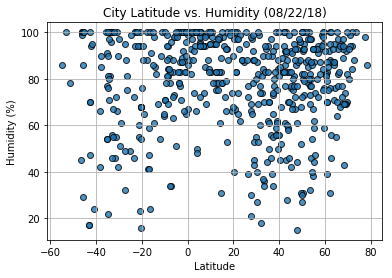

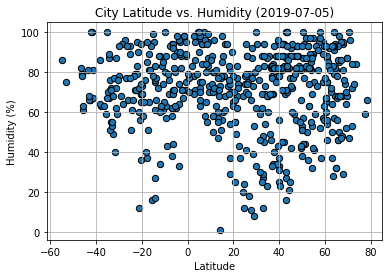

In [20]:
plt.scatter(pd.to_numeric(df.Lat, errors='coerce'), pd.to_numeric(df.Humidity, errors='coerce'), marker="o", 
            edgecolors="black", s=40)
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.axis(aspect='image')
plt.grid()
plt.savefig("City Lat vs Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

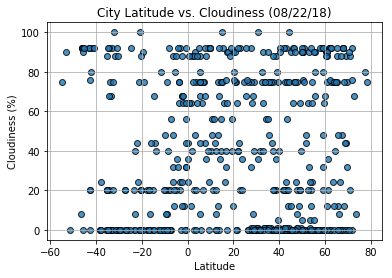

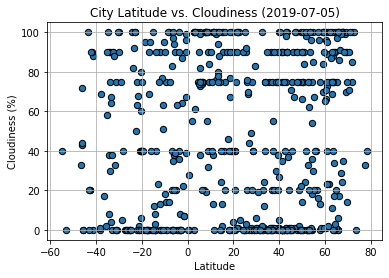

In [21]:
plt.scatter(pd.to_numeric(df.Lat, errors='coerce'), pd.to_numeric(df.Cloudiness, errors='coerce'), marker="o", 
            edgecolors="black", s=40)
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.axis(aspect='image')
plt.grid()
plt.savefig("City Lat vs Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

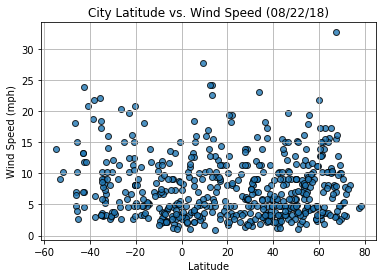

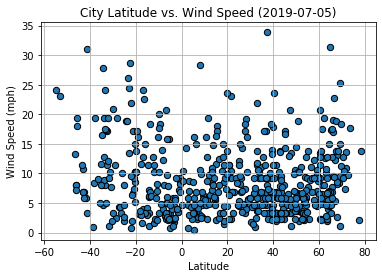

In [22]:
plt.scatter(pd.to_numeric(df.Lat, errors='coerce'), pd.to_numeric(df['Wind Speed'], errors='coerce'), marker="o", 
            edgecolors="black", s=40)
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.axis(aspect='image')
plt.grid()
plt.savefig("City Lat vs Humidity.png")
plt.show()